In [1]:
import pickle
import numpy as np
import scvelo as scv
import torch
import scanpy as sc
from veloproj import *

In [2]:
celltype_palette = {
    'HSC':'#d62728',
    'MPP':'#ad494a',
    'CMP':'#1f77b4',
    'GMP':'#aec7e8',
    'MEP':'#ff7f0e',
    'MKP':'#ff9896',
    'EryP':'#ffbb78',
    'MDP':'#8c6d31',
    'Mono':'#c49c94',
    'LMPP':'#aa40fc',
    'CLP':'#c5b0d5',
    'ProB':'#98df8a'}

In [3]:
# data from scp -r /media/liyaru/LYR/Diff_change/11_redeem/adata liyr@10.9.9.188:/home/liyr/Redeem/RNA_velocity_young2
adata = sc.read_h5ad("adata/redeem_young.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 9144 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'ATAC.weight', 'seurat_clusters', 'Sig.HSC1', 'Sig.Prog1', 'Sig.EarlyE1', 'Sig.LateE1', 'Sig.ProMono1', 'Sig.Mono1', 'Sig.ncMono1', 'Sig.cDC1', 'Sig.pDC1', 'Sig.ProB1', 'Sig.PreB1', 'Sig.B1', 'Sig.Plasma1', 'Sig.T1', 'Sig.CTL1', 'Sig.NK1', 'STD.CellType', 'STD_Cat', 'STD_Cat2', 'Sample', 'MitoCoverage', 'ClonalGroup', 'ClonalGroup.Prob', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'CellType', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'name', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'CellType_colors', 'STD.CellType_colors', 'neighbors', 'umap', 'velocity_gra

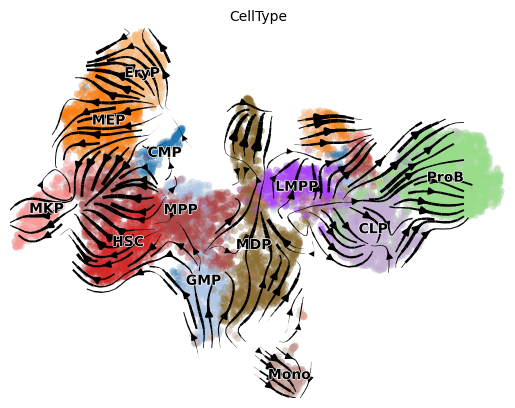

In [4]:
scv.pl.velocity_embedding_stream(adata,basis= 'umap',color="CellType",
                                vkey="velocity",
                                legend_loc = 'on data',
                                groups = ['HSC','MPP','CMP','GMP','MEP','MKP','EryP',
                                        'MDP','Mono',
                                        'LMPP','CLP','ProB'],
                                palette = celltype_palette,
                                linewidth = 2
                                )

In [7]:
label = 'CellType'
cluster_edges = [
    ("HSC", "MPP"),
    ('MPP','CMP'),('MPP','LMPP'),('MPP','GMP'),
    ('CMP','MEP'),
    ('MEP','MKP'),('MEP','EryP'),
    ('GMP','MDP'),
    ('LMPP','CLP'),
    ('CLP','ProB'),
    ('MDP','Mono')]

scv.tl.velocity_confidence(adata, vkey='velocity')
eva = evaluate(adata, cluster_edges, label, "velocity")

# Cross-Boundary Transition Score (A->B)
{('HSC', 'MPP'): 0.15053585, ('MPP', 'CMP'): 0.09991238, ('MPP', 'LMPP'): 0.084426574, ('MPP', 'GMP'): 0.102762945, ('CMP', 'MEP'): 0.100977615, ('MEP', 'MKP'): 0.19624862, ('MEP', 'EryP'): 0.050695486, ('GMP', 'MDP'): 0.16290583, ('LMPP', 'CLP'): 0.09722584, ('CLP', 'ProB'): 0.10154307, ('MDP', 'Mono'): 0.040919866}
Total Mean: 0.10801400989294052
# Cross-Boundary Velocity Coherence (A->B)
{('HSC', 'MPP'): 0.8803253, ('MPP', 'CMP'): 0.85224587, ('MPP', 'LMPP'): 0.8102604, ('MPP', 'GMP'): 0.8173673, ('CMP', 'MEP'): 0.77003497, ('MEP', 'MKP'): 0.86967534, ('MEP', 'EryP'): 0.869948, ('GMP', 'MDP'): 0.66207415, ('LMPP', 'CLP'): 0.7981223, ('CLP', 'ProB'): 0.80033046, ('MDP', 'Mono'): 0.68484443}
Total Mean: 0.8013843894004822
# Cross-Boundary Direction Correctness (A->B)
{('HSC', 'MPP'): 0.03659982935865325, ('MPP', 'CMP'): -0.21659728539608866, ('MPP', 'LMPP'): -0.28334263497343976, ('MPP', 'GMP'): -0.16747481980476409, ('CMP', 'MEP'): -0.15945539